# Modelo de detección de emociones en perros

Conectar con Google Drive

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importar librerías

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

Obtener las imágenes

In [16]:
%cd "/content/drive/MyDrive/IA/Proyecto"
path = "/content/drive/MyDrive/IA/Proyecto"

base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

/content/drive/MyDrive/IA/Proyecto


Data augmentation

Se voltearon las imágenes vertical y horizontalmente y se rotaron las imágenes 40 grados porque las fotos de perros suelen ser tomadas desde distintos ángulos. También se alargaron las imágenes para obtener escenarios con perros de distintas dimensiones.

Found 600 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

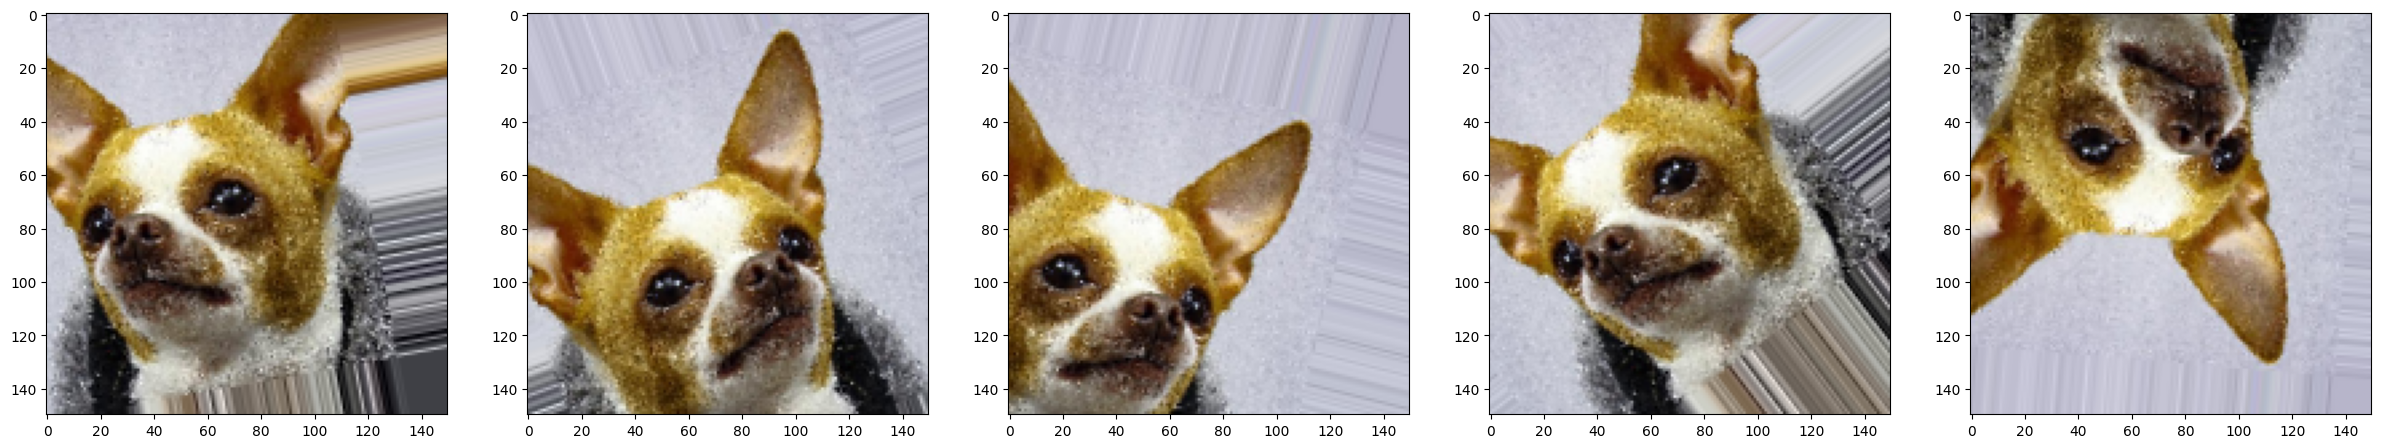

In [17]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							horizontal_flip = True,
							vertical_flip = True,)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							)


plt.figure()

f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Definición de las capas del modelo

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150, 150, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
 
model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 10)      280       
                                                                 
 flatten (Flatten)           (None, 219040)            0         
                                                                 
 dense (Dense)               (None, 256)               56074496  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 56,075,033
Trainable params: 56,075,033
Non-trainable params: 0
_________________________________________________________________


Entrenamiento del modelo

Epoch 1/40
75/75 [==============================] - 108s 1s/step - loss: 1.2819 - acc: 0.5000
Epoch 2/40
75/75 [==============================] - 92s 1s/step - loss: 0.8986 - acc: 0.5050
Epoch 3/40
75/75 [==============================] - 87s 1s/step - loss: 0.9135 - acc: 0.4800
Epoch 4/40
75/75 [==============================] - 87s 1s/step - loss: 0.8475 - acc: 0.5700
Epoch 5/40
75/75 [==============================] - 87s 1s/step - loss: 0.8830 - acc: 0.5217
Epoch 6/40
75/75 [==============================] - 96s 1s/step - loss: 0.8417 - acc: 0.5217
Epoch 7/40
75/75 [==============================] - 84s 1s/step - loss: 0.8106 - acc: 0.5533
Epoch 8/40
75/75 [==============================] - 85s 1s/step - loss: 0.8349 - acc: 0.5267
Epoch 9/40
75/75 [==============================] - 84s 1s/step - loss: 0.7979 - acc: 0.5383
Epoch 10/40
75/75 [==============================] - 83s 1s/step - loss: 0.8042 - acc: 0.5417
Epoch 11/40
75/75 [==============================] - 84s 1s/step - l

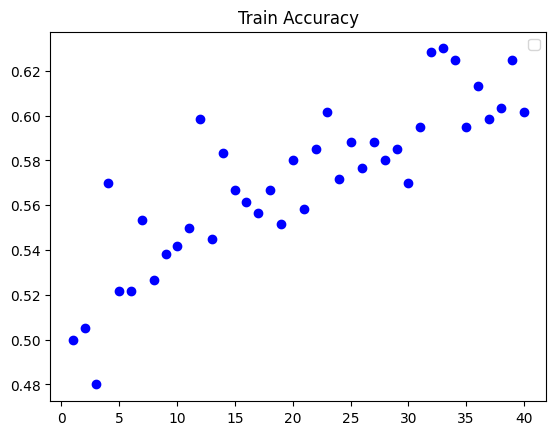

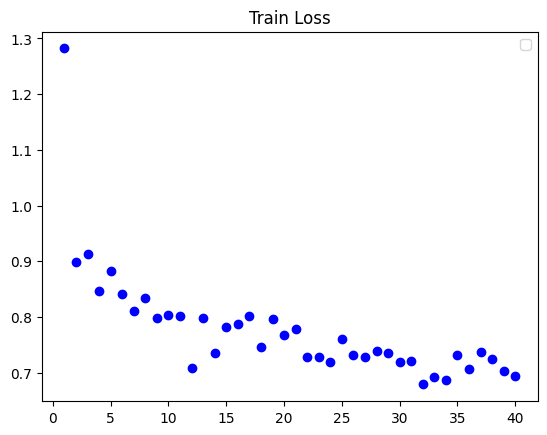

In [19]:
history = model.fit(train_generator, epochs = 40)
				
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo')
plt.title('Train Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo')
plt.title('Train Loss')
plt.legend()

plt.show()

Evaluación del modelo

In [20]:
test_datagen = ImageDataGenerator(1./255)

test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)

print('\nTest accuracy : ', test_acc)

Found 1400 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


25/25 [==============================] - 60s 2s/step - loss: 65.9936 - acc: 0.6640

Test accuracy :  0.6639999747276306
